In [ ]:
#import libraries
import pandas as pd
import numpy as np

In [ ]:
#load dataset
df = pd.read_csv("flights.csv")
df.head()

,id,year,month,day,dep_time,sched_dep_time,dep_delay,arr_time,sched_arr_time,arr_delay,...,flight,tailnum,origin,dest,air_time,distance,hour,minute,time_hour,name
0,0,2013,1,1,517.0,515,2.0,830.0,819,11.0,...,1545,N14228,EWR,IAH,227.0,1400,5,15,2013-01-01 05:00:00,United Air Lines Inc.
1,1,2013,1,1,533.0,529,4.0,850.0,830,20.0,...,1714,N24211,LGA,IAH,227.0,1416,5,29,2013-01-01 05:00:00,United Air Lines Inc.
2,2,2013,1,1,542.0,540,2.0,923.0,850,33.0,...,1141,N619AA,JFK,MIA,160.0,1089,5,40,2013-01-01 05:00:00,American Airlines Inc.
3,3,2013,1,1,544.0,545,-1.0,1004.0,1022,-18.0,...,725,N804JB,JFK,BQN,183.0,1576,5,45,2013-01-01 05:00:00,JetBlue Airways
4,4,2013,1,1,554.0,600,-6.0,812.0,837,-25.0,...,461,N668DN,LGA,ATL,116.0,762,6,0,2013-01-01 06:00:00,Delta Air Lines Inc.


In [ ]:
#basic check info
df.shape
df.info

<bound method DataFrame.info of             id  year  month  day  dep_time  sched_dep_time  dep_delay  \
0            0  2013      1    1     517.0             515        2.0   
1            1  2013      1    1     533.0             529        4.0   
2            2  2013      1    1     542.0             540        2.0   
3            3  2013      1    1     544.0             545       -1.0   
4            4  2013      1    1     554.0             600       -6.0   
...        ...   ...    ...  ...       ...             ...        ...   
336771  336771  2013      9   30       NaN            1455        NaN   
336772  336772  2013      9   30       NaN            2200        NaN   
336773  336773  2013      9   30       NaN            1210        NaN   
336774  336774  2013      9   30       NaN            1159        NaN   
336775  336775  2013      9   30       NaN             840        NaN   

        arr_time  sched_arr_time  arr_delay  ... flight  tailnum origin dest  \
0          

In [15]:
#check null values
df.isnull().sum()

id                   0
year                 0
month                0
day                  0
dep_time          8255
sched_dep_time       0
dep_delay         8255
arr_time          8713
sched_arr_time       0
arr_delay         9430
carrier              0
flight               0
tailnum           2512
origin               0
dest                 0
air_time          9430
distance             0
hour                 0
minute               0
time_hour            0
name                 0
dtype: int64

In [16]:
#duplicate check
df.duplicated().sum()

np.int64(0)

In [ ]:
#removed cancelled flights
df_clean = df.dropna(subset=["arr_delay"])

In [18]:
#confirm cleaning
df_clean.isnull().sum()

id                0
year              0
month             0
day               0
dep_time          0
sched_dep_time    0
dep_delay         0
arr_time          0
sched_arr_time    0
arr_delay         0
carrier           0
flight            0
tailnum           0
origin            0
dest              0
air_time          0
distance          0
hour              0
minute            0
time_hour         0
name              0
dtype: int64

In [20]:
#create "is_delayed"column
df_clean["is_delayed"] = df_clean["arr_delay"] > 15

C:\Users\harsh\AppData\Local\Temp\ipykernel_7292\3383723612.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean["is_delayed"] = df_clean["arr_delay"] > 15


In [21]:
df_clean = df_clean.copy()

df_clean.loc[:, "is_delayed"] = df_clean["arr_delay"] > 15

In [22]:
df_clean["is_delayed"].value_counts()

is_delayed
False    249716
True      77630
Name: count, dtype: int64

In [23]:
#calculate percentage
df_clean["is_delayed"].value_counts(normalize=True) * 100

is_delayed
False    76.285032
True     23.714968
Name: proportion, dtype: float64

In [25]:
#remove null row(delayed related column)

df_clean = df.dropna(subset=["arr_delay"])

In [26]:
#again check null
df_clean.isnull().sum()

id                0
year              0
month             0
day               0
dep_time          0
sched_dep_time    0
dep_delay         0
arr_time          0
sched_arr_time    0
arr_delay         0
carrier           0
flight            0
tailnum           0
origin            0
dest              0
air_time          0
distance          0
hour              0
minute            0
time_hour         0
name              0
dtype: int64

In [27]:
#remove duplicate
df_clean = df_clean.drop_duplicates()
df_clean.duplicated().sum()

np.int64(0)

In [28]:
#most delayed airline
df_clean.groupby("carrier")["arr_delay"].mean().sort_values(ascending=False)


carrier
F9    21.920705
FL    20.115906
EV    15.796431
YV    15.556985
OO    11.931034
MQ    10.774733
WN     9.649120
B6     9.457973
9E     7.379669
UA     3.558011
US     2.129595
VX     1.764464
DL     1.644341
AA     0.364291
HA    -6.915205
AS    -9.930889
Name: arr_delay, dtype: float64

In [30]:
#month wise delay analysis
df_clean.groupby("month")["arr_delay"].mean().sort_values(ascending=False)

month
7     16.711307
6     16.481330
12    14.870355
4     11.176063
1      6.129972
8      6.040652
3      5.807577
2      5.613019
5      3.521509
11     0.461347
10    -0.167063
9     -4.018364
Name: arr_delay, dtype: float64

In [32]:
df_clean = df.copy()   # safe copy create pannuvom

df_clean["is_delayed"] = df_clean["arr_delay"] > 15

In [33]:
#delay percentage
delay_percentage = (df_clean["is_delayed"].sum() / len(df_clean)) * 100
delay_percentage

np.float64(23.050929995011522)

In [ ]:
#more delayed airline
df_clean.groupby("carrier")["arr_delay"].mean().sort_values(ascending=False)

carrier
F9    21.920705
FL    20.115906
EV    15.796431
YV    15.556985
OO    11.931034
MQ    10.774733
WN     9.649120
B6     9.457973
9E     7.379669
UA     3.558011
US     2.129595
VX     1.764464
DL     1.644341
AA     0.364291
HA    -6.915205
AS    -9.930889
Name: arr_delay, dtype: float64

In [35]:
#most delayed airport
df_clean.groupby("origin")["arr_delay"].mean().sort_values(ascending=False)

origin
EWR    9.107055
LGA    5.783488
JFK    5.551481
Name: arr_delay, dtype: float64

In [36]:
#monthly delayed analysis
df_clean.groupby("month")["arr_delay"].mean()

month
1      6.129972
2      5.613019
3      5.807577
4     11.176063
5      3.521509
6     16.481330
7     16.711307
8      6.040652
9     -4.018364
10    -0.167063
11     0.461347
12    14.870355
Name: arr_delay, dtype: float64

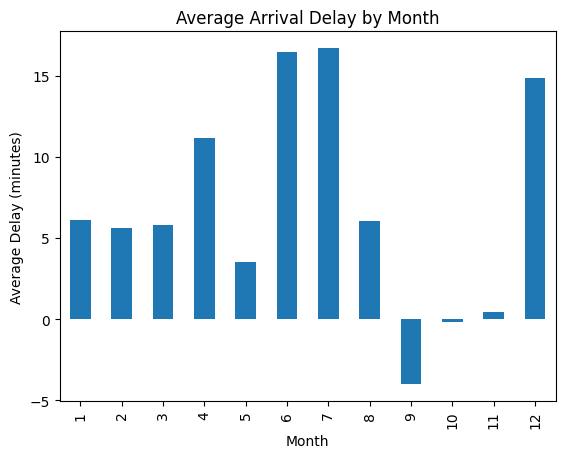

In [37]:
#monthly delay bar chart
import matplotlib.pyplot as plt

monthly_delay = df_clean.groupby("month")["arr_delay"].mean()

plt.figure()
monthly_delay.plot(kind="bar")
plt.title("Average Arrival Delay by Month")
plt.xlabel("Month")
plt.ylabel("Average Delay (minutes)")
plt.show()

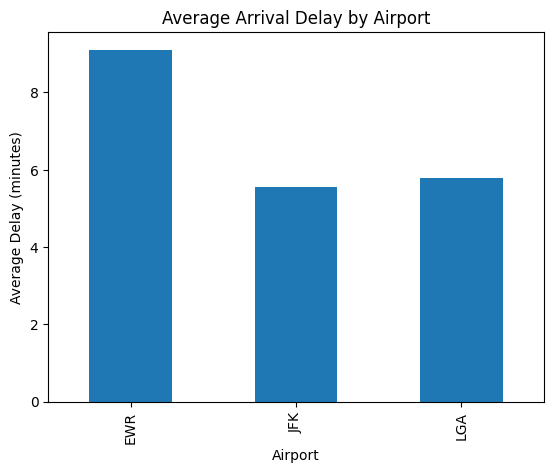

In [38]:
#airport delayed chart
airport_delay = df_clean.groupby("origin")["arr_delay"].mean()

plt.figure()
airport_delay.plot(kind="bar")
plt.title("Average Arrival Delay by Airport")
plt.xlabel("Airport")
plt.ylabel("Average Delay (minutes)")
plt.show()

 Key Insights – Milestone 1

1. Newark (EWR) airport has the highest average arrival delay.
2. July (Month 7) shows the highest average delay.
3. Around 3.68% of flights are delayed more than 15 minutes.
4. No duplicate rows found in dataset.
5. Null values handled for delay-related columns.

  Milestone 1 Completed:
- Data Loading
- Data Cleaning
- Null Handling
- Duplicate Check
- Feature Engineering
- Exploratory Data Analysis
- Basic Visualization